### Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Problem Statement

We need to predict whether our policy holder will pay the next premiuim or will not pay.
Hence Its a classification problem

## 2. Hypothesis Generation

Our policy holder will pay the next premium depends on number of factors.
A. BACKGROUNG OF CUSTOMER
    1. Age
    2. Income
    3. Education
    4. Family size (Married or single)
    5. Health - (having any severe disease)
    6. Job type(govt or private)
    7. Previously paid premiums - (on time or had delayed)

B. CURRENT STATUS
    1. any Recently hospitalization?
    2. Any govt policy that have affect the customer
    3. Last premium paid or not

Note : The data extraction part had been alreday done, So moving forward on next step : Exploratory Data Analysis.

## 3. EDA

### 3.1 Reading Data

In [2]:
train = pd.read_csv('train_qnU1GcL (1).csv')
test = pd.read_csv('test_LxCaReE_DvdCKVT_v2s0Z4r.csv')

In [3]:
## Combining the train and test dataset for EDA
df = pd.concat([train, test], axis=0)

### 3.2 Variable Identification 

In [4]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [5]:
print(train.shape)
print(test.shape)

(79853, 12)
(34224, 11)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  target                            79853 non-null  int64  
dtypes: f

In [7]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


Observation :

A. Numeric Variables
    
    A-1. Continuous Variables
    perc_premium_paid_by_cash_credit, age_in_days, Income, application_underwriting_score
    
    A-2. Discrete Variables
    id, Count_3-6_months_late, Count_6-12_months_late, Count_more_than_12_months_late, no_of_premiums_paid
    
B. Categorical Variable
    
    B-2. Nominal
    sourcing_channel, residence_area_type
    
    B-1. Ordinal - No ordinal variables.

C. Target variables :'target'  

### 3.3 Univariate Analysis 

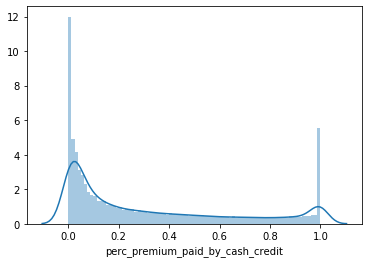

In [8]:
sns.distplot(df['perc_premium_paid_by_cash_credit'], bins = 80)

([<matplotlib.axis.XTick at 0x1e92410e9c8>,
 <a list of 20 Text xticklabel objects>)

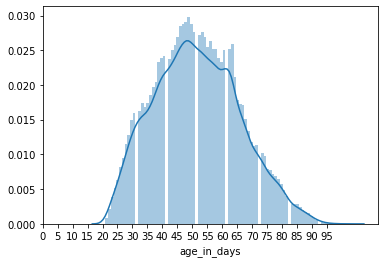

In [9]:
sns.distplot(df['age_in_days']//365, bins=90)
plt.xticks(range(0,100,5))

([<matplotlib.axis.YTick at 0x1e925281a08>,
 <a list of 11 Text yticklabel objects>)

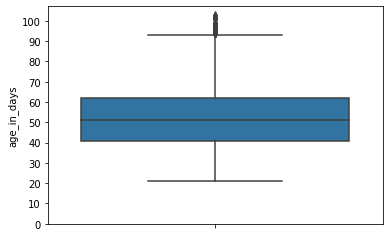

In [10]:
sns.boxplot(y = df['age_in_days']//365)
plt.yticks(range(0,110,10))

Observation :
    
    1. When we find age in years, its distribution is symmetric.
    2. we can fing several age groups i.e. (<40 : young, 40-60 : non-retired, >60: retired)
    3. Have some outliers : age above 90.

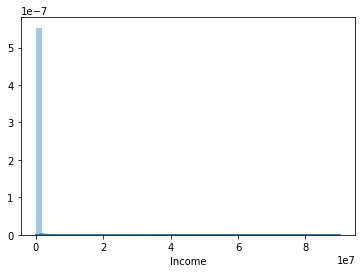

In [11]:
sns.distplot(df['Income'])

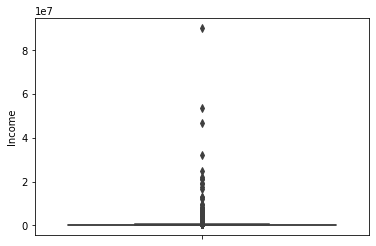

In [12]:
sns.boxplot(y = df['Income'])

Observation :
    
    1. Majority people has Income < 10000000
    2. Contains some otliers

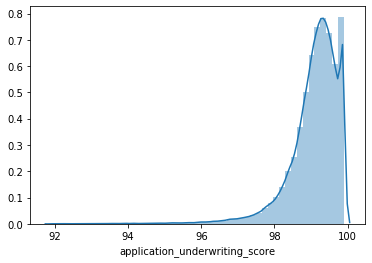

In [13]:
sns.distplot(df['application_underwriting_score'])

Observation :

    1. Highly left skewed
    2. Contains missing values

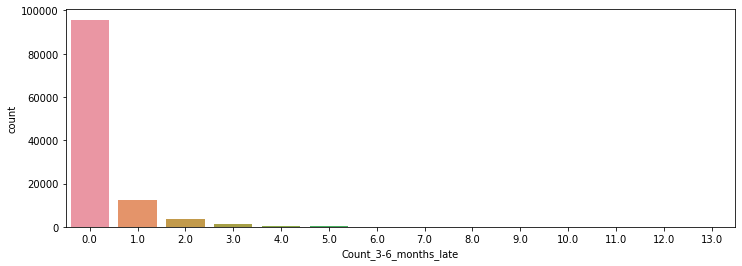

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(df['Count_3-6_months_late'])

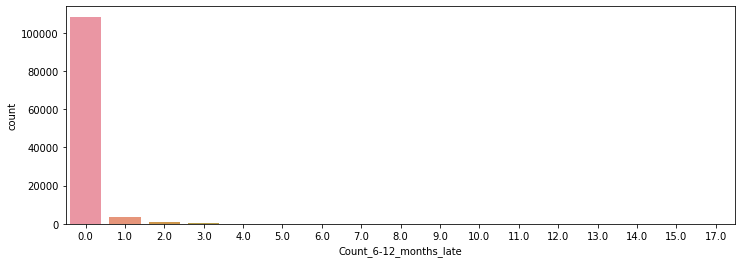

In [15]:
plt.figure(figsize=(12,4))
sns.countplot(df['Count_6-12_months_late'])

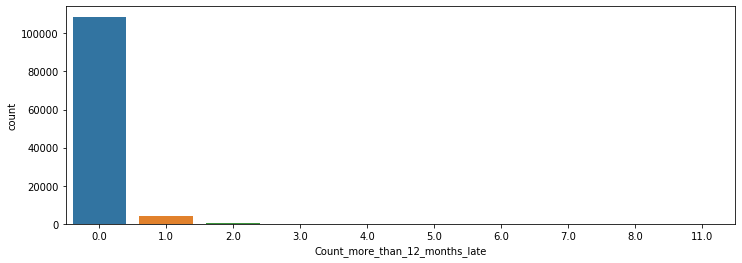

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(df['Count_more_than_12_months_late'])

In [17]:
data = df[pd.isnull(df['Count_3-6_months_late'])]

In [18]:
data['no_of_premiums_paid'].value_counts()

2    126
3      2
Name: no_of_premiums_paid, dtype: int64

Observations:
    
    1. Majority customer pays all premium on time
    2. The missing values in no. late premium payed is beacuse they are those custome who had taken policy recently - less  than three months ago

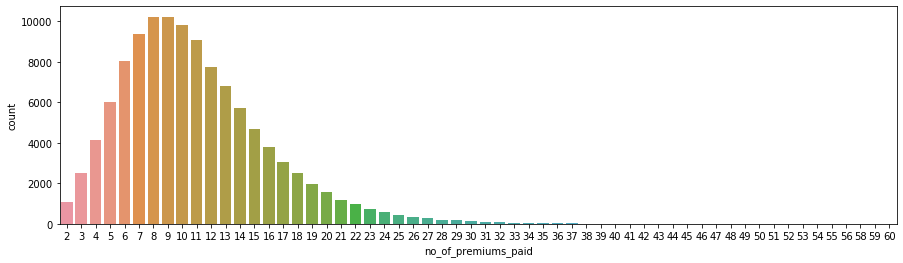

In [19]:
plt.figure(figsize=(15,4))
sns.countplot(df['no_of_premiums_paid'])

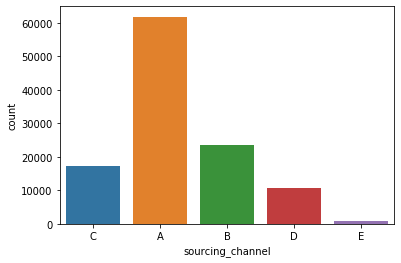

In [20]:
sns.countplot(df['sourcing_channel'])

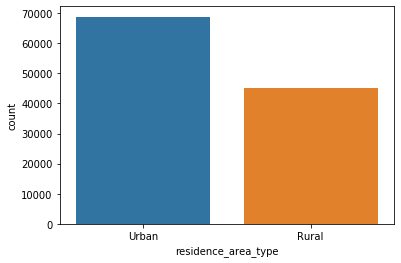

In [21]:
sns.countplot(df['residence_area_type'])

### 3.4 Bivariate Analysis

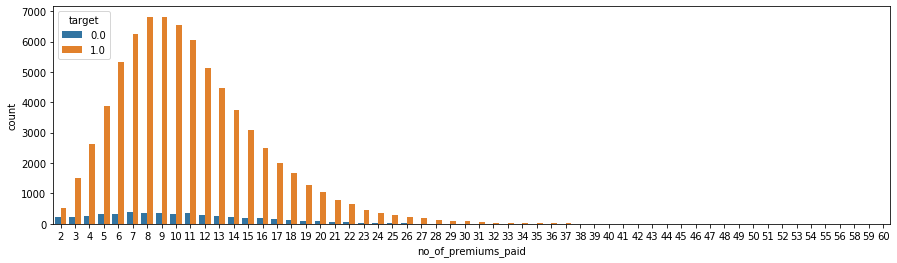

In [22]:
y = pd.crosstab(df['no_of_premiums_paid'], df['target'])
plt.figure(figsize=(15,4))
sns.countplot(df['no_of_premiums_paid'], hue = df['target'])

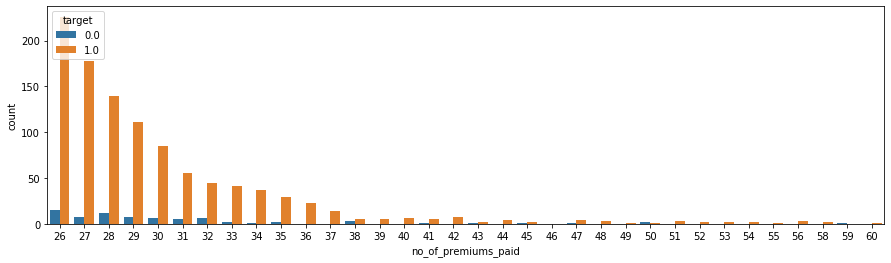

In [23]:
plt.figure(figsize=(15,4))
data = df[df['no_of_premiums_paid']>25]
sns.countplot(data['no_of_premiums_paid'], hue = data['target'])

Obseravtions :

    1. Customers which are new to the company, there are very high chances that they do not pay their next premium

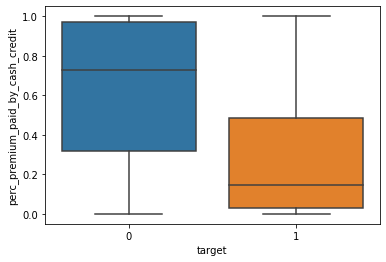

In [24]:
sns.boxplot(x = train['target'], y = train['perc_premium_paid_by_cash_credit'])

Observations :

    1. Customers who pay less percentage of premium amount by cash or credit card, are likely to pay thier next premium.

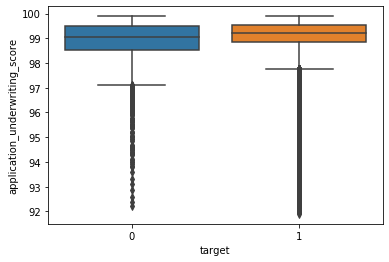

In [25]:
sns.boxplot(x = train['target'], y = train['application_underwriting_score'])

Observation:

    The custome will pay the next premium or not does not depends on application_underwriting_score, which in a sense is correct because its the score at the time of availing the policy

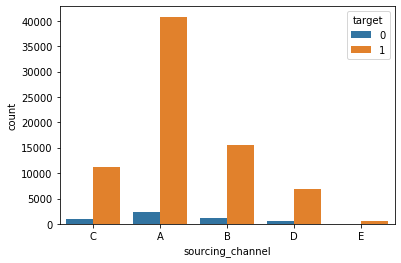

In [26]:
sns.countplot(train['sourcing_channel'], hue = train['target'])

In [27]:
train.groupby('sourcing_channel')['target'].value_counts()

sourcing_channel  target
A                 1         40785
                  0          2349
B                 1         15446
                  0          1066
C                 1         11136
                  0           903
D                 1          6925
                  0           634
E                 1           563
                  0            46
Name: target, dtype: int64

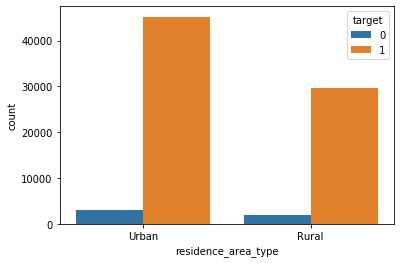

In [28]:
sns.countplot(train['residence_area_type'], hue = train['target'])

### 3.5 Missing Values

In [29]:
train['application_underwriting_score'].fillna(train['application_underwriting_score'].mean(), inplace = True)

In [30]:
test['application_underwriting_score'].fillna(train['application_underwriting_score'].mean(), inplace = True)

In [31]:
train['Count_more_than_12_months_late'].fillna(np.mean(train['Count_more_than_12_months_late']),inplace=True)

In [32]:
test['Count_more_than_12_months_late'].fillna(np.mean(test['Count_more_than_12_months_late']),inplace=True)
test['Count_6-12_months_late'].fillna(np.min(test['Count_6-12_months_late']),inplace=True)
test['Count_3-6_months_late'].fillna(np.min(test['Count_3-6_months_late']),inplace=True)

In [33]:
train.dropna(axis=0, inplace = True)

In [34]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [35]:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

### 3.6 Outlier Treatment

In [36]:
train['age_in_days'] = train['age_in_days']//365

In [37]:
test['age_in_days'] = test['age_in_days']//365

In [38]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79756.000000,79756.000000,79756.000000,7.975600e+04,79756.000000,79756.000000,79756.000000,79756.000000,79756.000000,79756.000000
mean,57168.377288,0.313454,51.624179,2.089946e+05,0.248671,0.078188,0.060008,99.067062,10.874643,0.938086
std,32930.361608,0.334263,14.263371,4.968563e+05,0.691468,0.436507,0.312023,0.726210,5.164617,0.241001
min,2.000000,0.000000,21.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.750000,0.034000,41.000000,1.080500e+05,0.000000,0.000000,0.000000,98.830000,7.000000,1.000000
50%,57262.500000,0.167000,51.000000,1.667400e+05,0.000000,0.000000,0.000000,99.180000,10.000000,1.000000
75%,85637.250000,0.536000,62.000000,2.521100e+05,0.000000,0.000000,0.000000,99.520000,14.000000,1.000000
max,114076.000000,1.000000,103.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


([<matplotlib.axis.XTick at 0x1e925e5c708>,
 <a list of 20 Text xticklabel objects>)

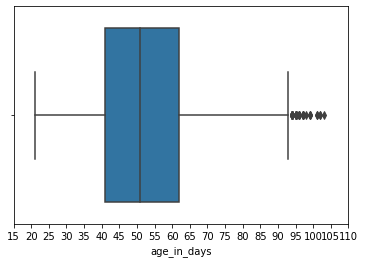

In [39]:
sns.boxplot(train['age_in_days'])
plt.xticks(range(15,115,5))

In [40]:
train.loc[train['age_in_days']>90, 'age_in_days'] = np.mean(train['age_in_days'])

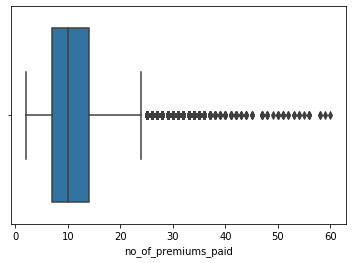

In [41]:
sns.boxplot(train['no_of_premiums_paid'])

In [42]:
train.loc[train['no_of_premiums_paid']>25, 'no_of_premiums_paid'] = np.mean(train['no_of_premiums_paid'])

In [43]:
q1 = train['Income'].quantile(0.25)
q3 = train['Income'].quantile(0.75)
iqr = q3-q1
llim = q1 - 1.5*iqr
ulim = q3+1.5*iqr

In [44]:
train.loc[train['Income']>ulim, 'Income'] = np.mean(train['Income'])

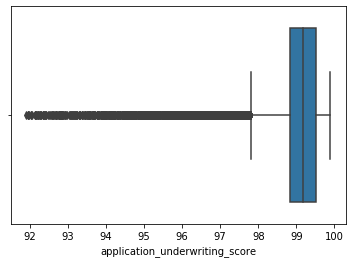

In [45]:
sns.boxplot(train['application_underwriting_score'])

([<matplotlib.axis.XTick at 0x1e925b8ed48>,
 <a list of 16 Text xticklabel objects>)

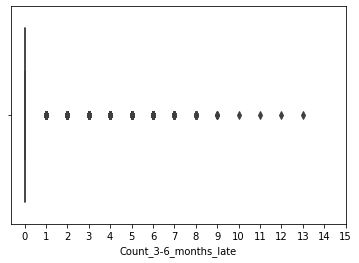

In [46]:
sns.boxplot(train['Count_3-6_months_late'])
plt.xticks(range(0,16))

In [47]:
train.loc[train['Count_3-6_months_late']>1, 'Count_3-6_months_late'] = np.mean(train['Count_3-6_months_late'])

In [48]:
train.loc[train['Count_6-12_months_late']>5, 'Count_6-12_months_late'] = np.mean(train['Count_6-12_months_late'])

In [49]:
train.loc[train['Count_more_than_12_months_late']>4, 'Count_more_than_12_months_late'] = np.mean(train['Count_more_than_12_months_late'])

### 3.7 Variable Transformation

In [50]:
train['Income'] = train['Income']**0.5

In [51]:
test['Income'] = test['Income']**0.5

In [52]:
train['sourcing_channel'] = train['sourcing_channel'].replace({'A':1, 'B':2,'C':3,'D':4,'E':5})
test['sourcing_channel'] = test['sourcing_channel'].replace({'A':1, 'B':2,'C':3,'D':4,'E':5})

In [53]:
train['residence_area_type'] = train['residence_area_type'].replace({'Urban':1, 'Rural':0})
test['residence_area_type'] = test['residence_area_type'].replace({'Urban':1, 'Rural':0})

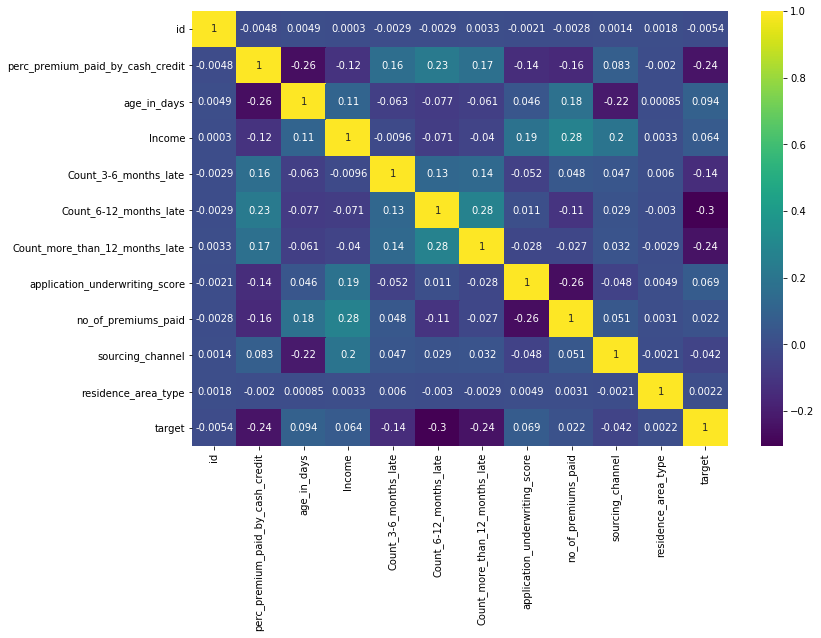

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap = 'viridis', annot = True)

## Training Model

In [55]:
test.shape, train.shape

((34224, 11), (79756, 12))

In [56]:
sub = pd.DataFrame(test['id'])
train.drop('id', axis=1, inplace = True)
test.drop('id', axis=1,inplace = True)

In [57]:
X = train.drop('target',1)
y = train['target']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
from sklearn.metrics import roc_auc_score

In [62]:
clf1 = DecisionTreeClassifier()

In [63]:
clf1.fit(X1_train, y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
clf1.score(X1_train, y1_train)

1.0

In [65]:
clf1.score(X1_valid, y1_valid)

0.898900823337652

In [66]:
roc_auc_score(y1_valid, clf1.predict(X1_valid))

0.5955345618017537

## Predictions

In [67]:
Pre = pd.DataFrame(clf1.predict(test))

In [68]:
Pre.columns = ['target']

In [69]:
pre = pd.concat([sub, Pre], axis=1)

In [71]:
pre.to_csv('final_submission01.csv', index = False)

This model provided with an Roc curve score of 0.59

## Linear Regression


In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model = LinearRegression()

In [74]:
model.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
roc_auc_score(y1_valid ,model.predict(X1_valid))

0.8228012348095319

Linear regression proved to be better model for classification problem, and the output for any input is between 0 to 1. So we can assume that this model predicts the probbility and by setting a threshold we can convert them to classes that are pre defined.